<a href="https://colab.research.google.com/github/journalWheat/CSI4106-Project1/blob/main/CSI4106_Project1_JaredWagner_WineDataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Title: Predicting the colour of a wine using Naive Bayes, Logistic Regression, and Multi-Layer Perceptron learning algorithms**

##**GROUP 97**
####@AUTHOR JARED WAGNER (Student \#300010832), Fall 2022.
####Submitted for CSI4106, Introduction to Artificial Intelligence. 
#####Project repository: https://github.com/journalWheat/CSI4106-Project1

#**Section 1: Introduction and goals**
-----
##An ode to wine
```
Hey come lets scatter flowers around,
and fill the chalice up with wine.
We'll crack the heavens' vault in half,
and hew a wholly new design. 
(Excerpt from 'Wine, Humans and Song,' translated from medieval Persian poet Hafez.)
``` 
([Source](http://poemsintranslation.blogspot.com/2015/07/hafiz-ghazal-367-human-wine-and-song.html?m=1)) + ([Info on Hafez](https://en.wikipedia.org/wiki/Hafez))

Wine, dear wine:

You have profoundly impacted the world. Though many people abstain from you, those who partake in consuming you become mind-bent by your company. Sommeliers might be the most mind-bent of us, specializing in combining their senses with their knowledge about wine's history to make appropriately fancy recommendations: what wine to pair with your salmon or your steak, what wine to bring to a house party, what wine to bring on a first date, and so on and so forth.

This is not a new phenomenon. The first evidence of grape wine production dates to 6100 years ago in an Armenian cave ([Source](https://www.decanter.com/wine-news/armenian-find-is-world-s-oldest-winery-42433/)). Dating back even further, anywhere from 9000 to 11000 years ago, there is evidence of a grape and rice wine being produced in China ([Source](https://www.sciencedirect.com/science/article/pii/S2212977418300619?via%3Dihub)). Perhaps humans' historied fixation upon wine is why in March 2020, a disputed story went viral across social media that claimed a group of elephants had broken into a village in China, "drinking 30kg of corn wine [before] they fell asleep in a nearby tea garden." ([Source](https://www.wusa9.com/article/news/verify/verify-did-elephants-get-drunk-on-corn-wine-while-humans-were-social-distancing/507-0c48ef63-33ec-478f-be6a-4ebdeb4b0299#:~:text=The%20tweet%20claimed%20the%20elephants,every%20instance%20of%20this%20post.))

Sommeliers with the most sensitive olfactory senses go on to write wine manuals (or so the story goes). These textbooks outline the expected characteristics of a peppery Australian Shiraz vs. a fruitful French Pinot Noir; of a vintage from 1980 vs. the same wine produced just last year. Many of these manuals even compare wines from different regions within a country, or sub-regions within a province, state, or territory. If your Chianti didn't come from the Chianti region of Tuscany, Italy, you may be entitled to compensation as part of a class action lawsuit. 

That was a joke, but it has a grain of truth. Many jurisdictions, including Italy, France, and even Ontario, have strict regulations for wine manufacture and labelling. In-order, these are called the DOP, AOC, and VQA standards. This is to be expected, given that the wine industry is a highly profitable sector: in 2019, the Canadian wine industry alone was valued at $11.57 billion dollars. ([source](https://www.winegrowerscanada.ca/our-industry/economic-impact/))

-----
##Data and goals
The dataset used in this analysis contains samples of various Viho Verde style wines from Portugal (the famous origin of "port" style wines), first published in 2009. The data was taken from Kaggle, where it had been shared from the UCI Machine Learning Repository.

This dataset is purportedly intended for models that would rank the wines, since there is an attached 'quality' metric for each sample. However, after seeing that each wine was also categorized by 'type' ('red'/'white'), this brought to mind an infamous study from 2001 ([source](http://www.daysyn.com/Morrot.pdf)) where 54 students training to become sommeliers were fooled by experimentors who had dyed white wine red. 

From the researchers' mischief, the students described the "red white wine" as they would a red wine, even though they had previously described the same white wine entirely differently when they had known it was a white wine with stereotypical character of a white wine. Few of the students consistently described the wine before and after it had been dyed, leading the researchers to suggest that the visual appearance of wine had a large affect on the participants' other senses. (Various news agencies were less charitable. In 2014, Gizmodo published an article "Wine tasting is bullshit. Here's why." ([Source](https://gizmodo.com/wine-tasting-is-bullshit-heres-why-496098276)) which cited the study to prove that "expert wine critics can't distinguish between red and white wines").

###The spurring of a question
Although the primary goal of this report's analysis is to compare the relative strengths of pitfalls associated with Naive Bayes, Logistic, and Multi-Layer Perceptron models, this story with the sommeliers leads to my personal tongue-in-cheek question: "can a computer guess whether a wine is red or white better than a a sommelier?" 

To answer this question, I will train three classification models using the aforementioned algorithms to determine whether a wine is 'white' or 'red' from the given features in the data set. Because there are only two classes, this is a binary classification problem. From these models, I will:
- Compare and contrast the effectiveness of each model for this task.
- Explore these models with a hands-on approach.
- Compare the sommeliers' performance to "a computer's" performance, i.e. my models.

###Applications
The question "can a computer guess whether a wine is red or white better than a sommelier," although humorous, has a real-world value. On its face it has entertainment value (otherwise no articles would be written about it), but looking closer it also conjours up questions about wine curation as a profession. If a computer can be a "virtual sommelier," then one can think of all kinds of applications for that. Exploring one example, imagine filling out a questionnaire from an app on your phone about your wine preferences, and then zap! Your phone returns a list of 10 wines it thinks that you will enjoy. No hiring a specialist, no wasting time, you know exactly what you want after 2 minutes with the app. 

Of course the results of this experiment do not *directly* fit into that example, but the models designed here could be components of that application. For example, if these models characterize a white wine as a red, then this could be a clue that this "white" wine has a red-like flavor profile that will not be appreciated as much by a person who does not like red wine.
#**Section 2: Analyzing the dataset
-----
##Analyzing the dataset

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


Missing values table
type                     0
fixed acidi

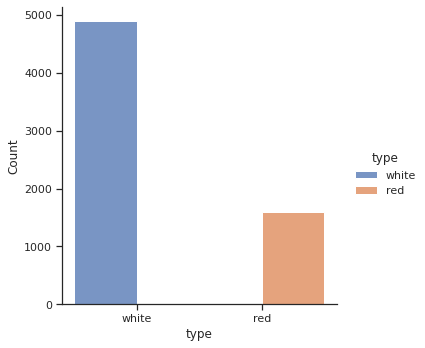

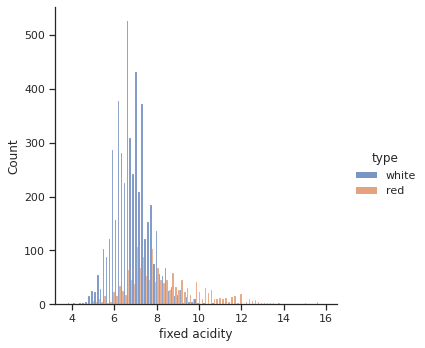

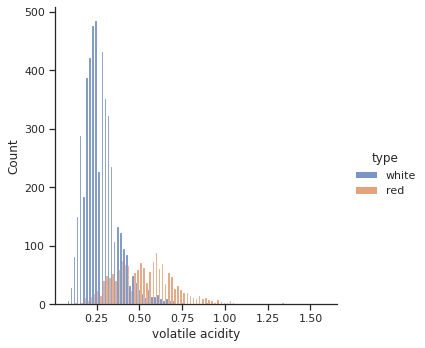

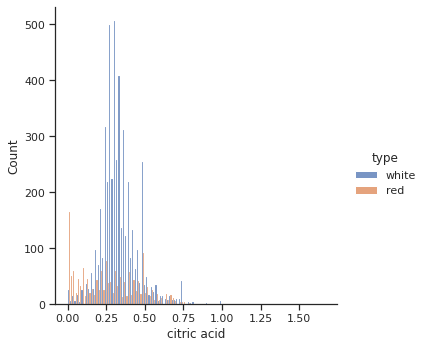

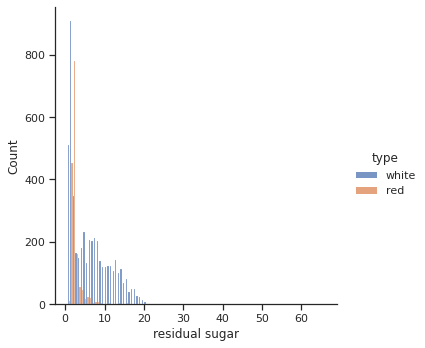

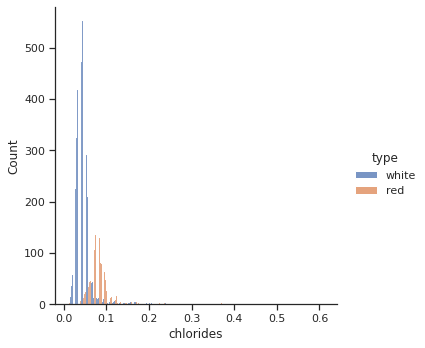

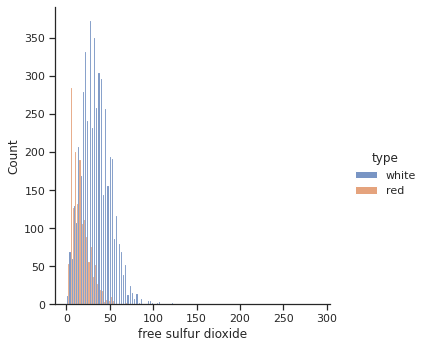

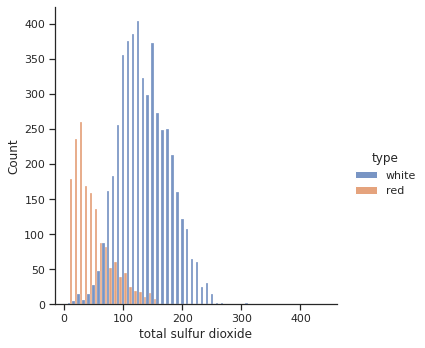

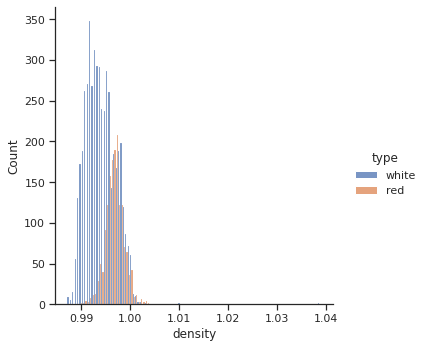

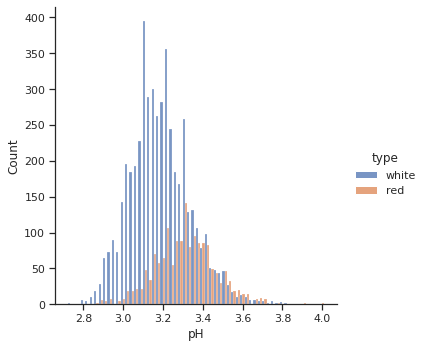

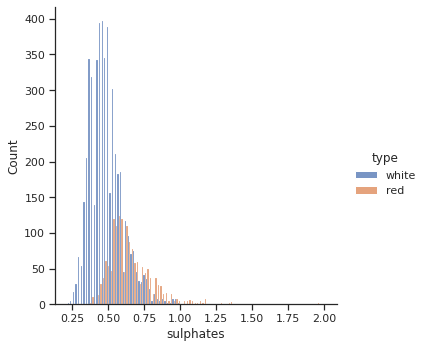

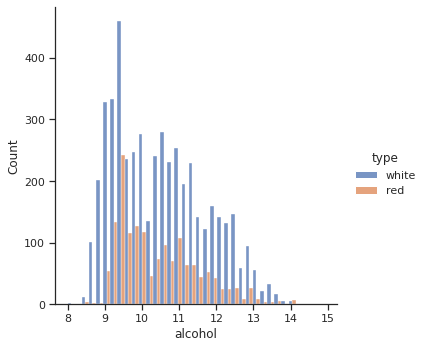

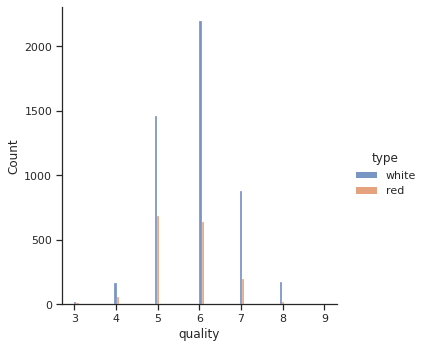

In [452]:
# data from: https://www.kaggle.com/datasets/rajyellow46/wine-quality
# seaborn docs: https://seaborn.pydata.org/tutorial/distributions.html
# imports for data processing
import pandas as pd
import numpy as np

# imports and settings for nice graphs
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.notebook_repr_html', True)
sns.set_palette(palette='deep')
sns.set_style(style='ticks')

# df info: location, target column
df_location = 'https://raw.githubusercontent.com/journalWheat/CSI4106-Project1/main/winequalityN.csv' 
sample_location = 'https://raw.githubusercontent.com/journalWheat/CSI4106-Project1/main/sample.csv'
target = 'type'

# read data
raw_df = pd.read_csv(df_location)

# print some useful statistics
display(raw_df.head(5))
print("\n") ############################## line break
raw_df.info(verbose=True, show_counts=True)
print("\n") ############################## line break
print("Missing values table")
print(raw_df.isna().sum())
print("TOTAL null=",raw_df.isna().sum().sum())
print("\n") ############################## line break
#med_sample_df = raw_df[100:601].copy() # sample of 500
#small_sample_df = raw_df[:100].copy() # sample of 100

# Compare the distributions of each feature
# for column in raw_df.drop(columns='target', axis=1):
for column in raw_df:
  sns.displot(raw_df, x=column, hue=target, multiple='dodge')

##Initial observations
That's a lot of data! These are the key highlights about this dataset:
1. The samples are not shuffled in the dataframe.
2. There are 6497 samples, and 38 missing values.
3. There are 13 columns. Excluding the target variable 'type', that means that there are 12 potential predictors.
4. The target value is biased towards 'white' by a ratio of ~1:4.
5. The data is not uniformly distributed. No action is required on this point, but if all features were uniformly distributed (either by a true random distribution or by a then that would potentially indicate that the data is fake; an unfortunate consideration for Kaggle-sourced data.

##Initial discussion (sorted by points in 'Initial observations')
1. The dataframe needs to be shuffled so that data folds taken with KFold in Section 5 are also shuffled. This can be achieved using KFold itself, but there is more analysis to do in this section which also required a shuffled dataframe (specifically whether the data is separable). Therefore, the data will be read again and shuffled using a seed. Shuffling using a seed ensures that an astute reader with access to the dataset could repeat the experiments herein, since shuffling with the same seed will result in an identically shuffled dataset.
2. 6497 samples is a reasonable amount of data for the purposes of this report. Since the number of missing values is low, just 38, they will simply be discared; it is unlikely that such a small sample will have much impact on the models given the relatively high number of samples.
3. 12 predictors might be high or might be low, but that cannot be determined from the data above. Feature selection is discussed in Section 3, where graphical "common sense" and methodical solutions are compared for the data.
4. This is an "orange flag." It could impact model training, but not necessarily depending on the features selected.
5. Lucky! Well, this data is from a real publication, so that is expected. There are a lot of fake datasets on Kaggle. This is discussed under 'Disclosure' at the end of the notebook, as this is the third dataset under consideration (the other two looked "too good to be true," i.e. likely computer generated data.)

One last thing need to be determined: is the data learnable? One "common sense" solution is to create a scatterplot matrix. If there are a number of scatterplots where the data "looks like" it could be separated by a line, that is a promising rule of thumb that the data is learnable.

##Transformations
Before proceeding, some transformations are made on the raw data. Specifically:
- The data is shuffled.
- Null values are dropped.


In [453]:
# re-reading the data from CSV such that it is (reproducibly) randomized
seed = 1

raw_df = pd.read_csv(df_location).dropna().sample(n=len(pd.read_csv(df_location).dropna()),random_state=seed)
med_sample_df = raw_df[43:643].copy() # sample of 600
small_sample_df = raw_df[43:143].copy() # sample of 100

# display the data to demonstrate it is shuffled ... no matter how many times this cell is ran, the order of the data will be the same since it is shuffled from a seed
display(raw_df.head(5))

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3746,white,7.4,0.27,0.28,1.8,0.040,45.0,121.0,0.99043,3.02,0.40,11.9,5
425,white,7.0,0.21,0.28,8.7,0.045,37.0,222.0,0.99540,3.25,0.54,10.4,6
3967,white,6.3,0.27,0.51,7.6,0.049,35.0,200.0,0.99548,3.16,0.54,9.4,4
6098,red,7.7,0.57,0.21,1.5,0.069,4.0,9.0,0.99458,3.16,0.54,9.8,6
3184,white,6.2,0.10,0.41,1.0,0.040,17.0,76.0,0.98988,3.14,0.56,11.4,7


##Final analysis
Finally, a small subset of 100 samples is plotted with a scatterplot matrix.

From the matrix, there are several plots which seems to be separable with a line (the best example of this is any of the plots for 'total sulfur dioxide'), meaning that the target class is likely learnable. This scatterplot will be referred back to in the next section where feature selection is discussed.

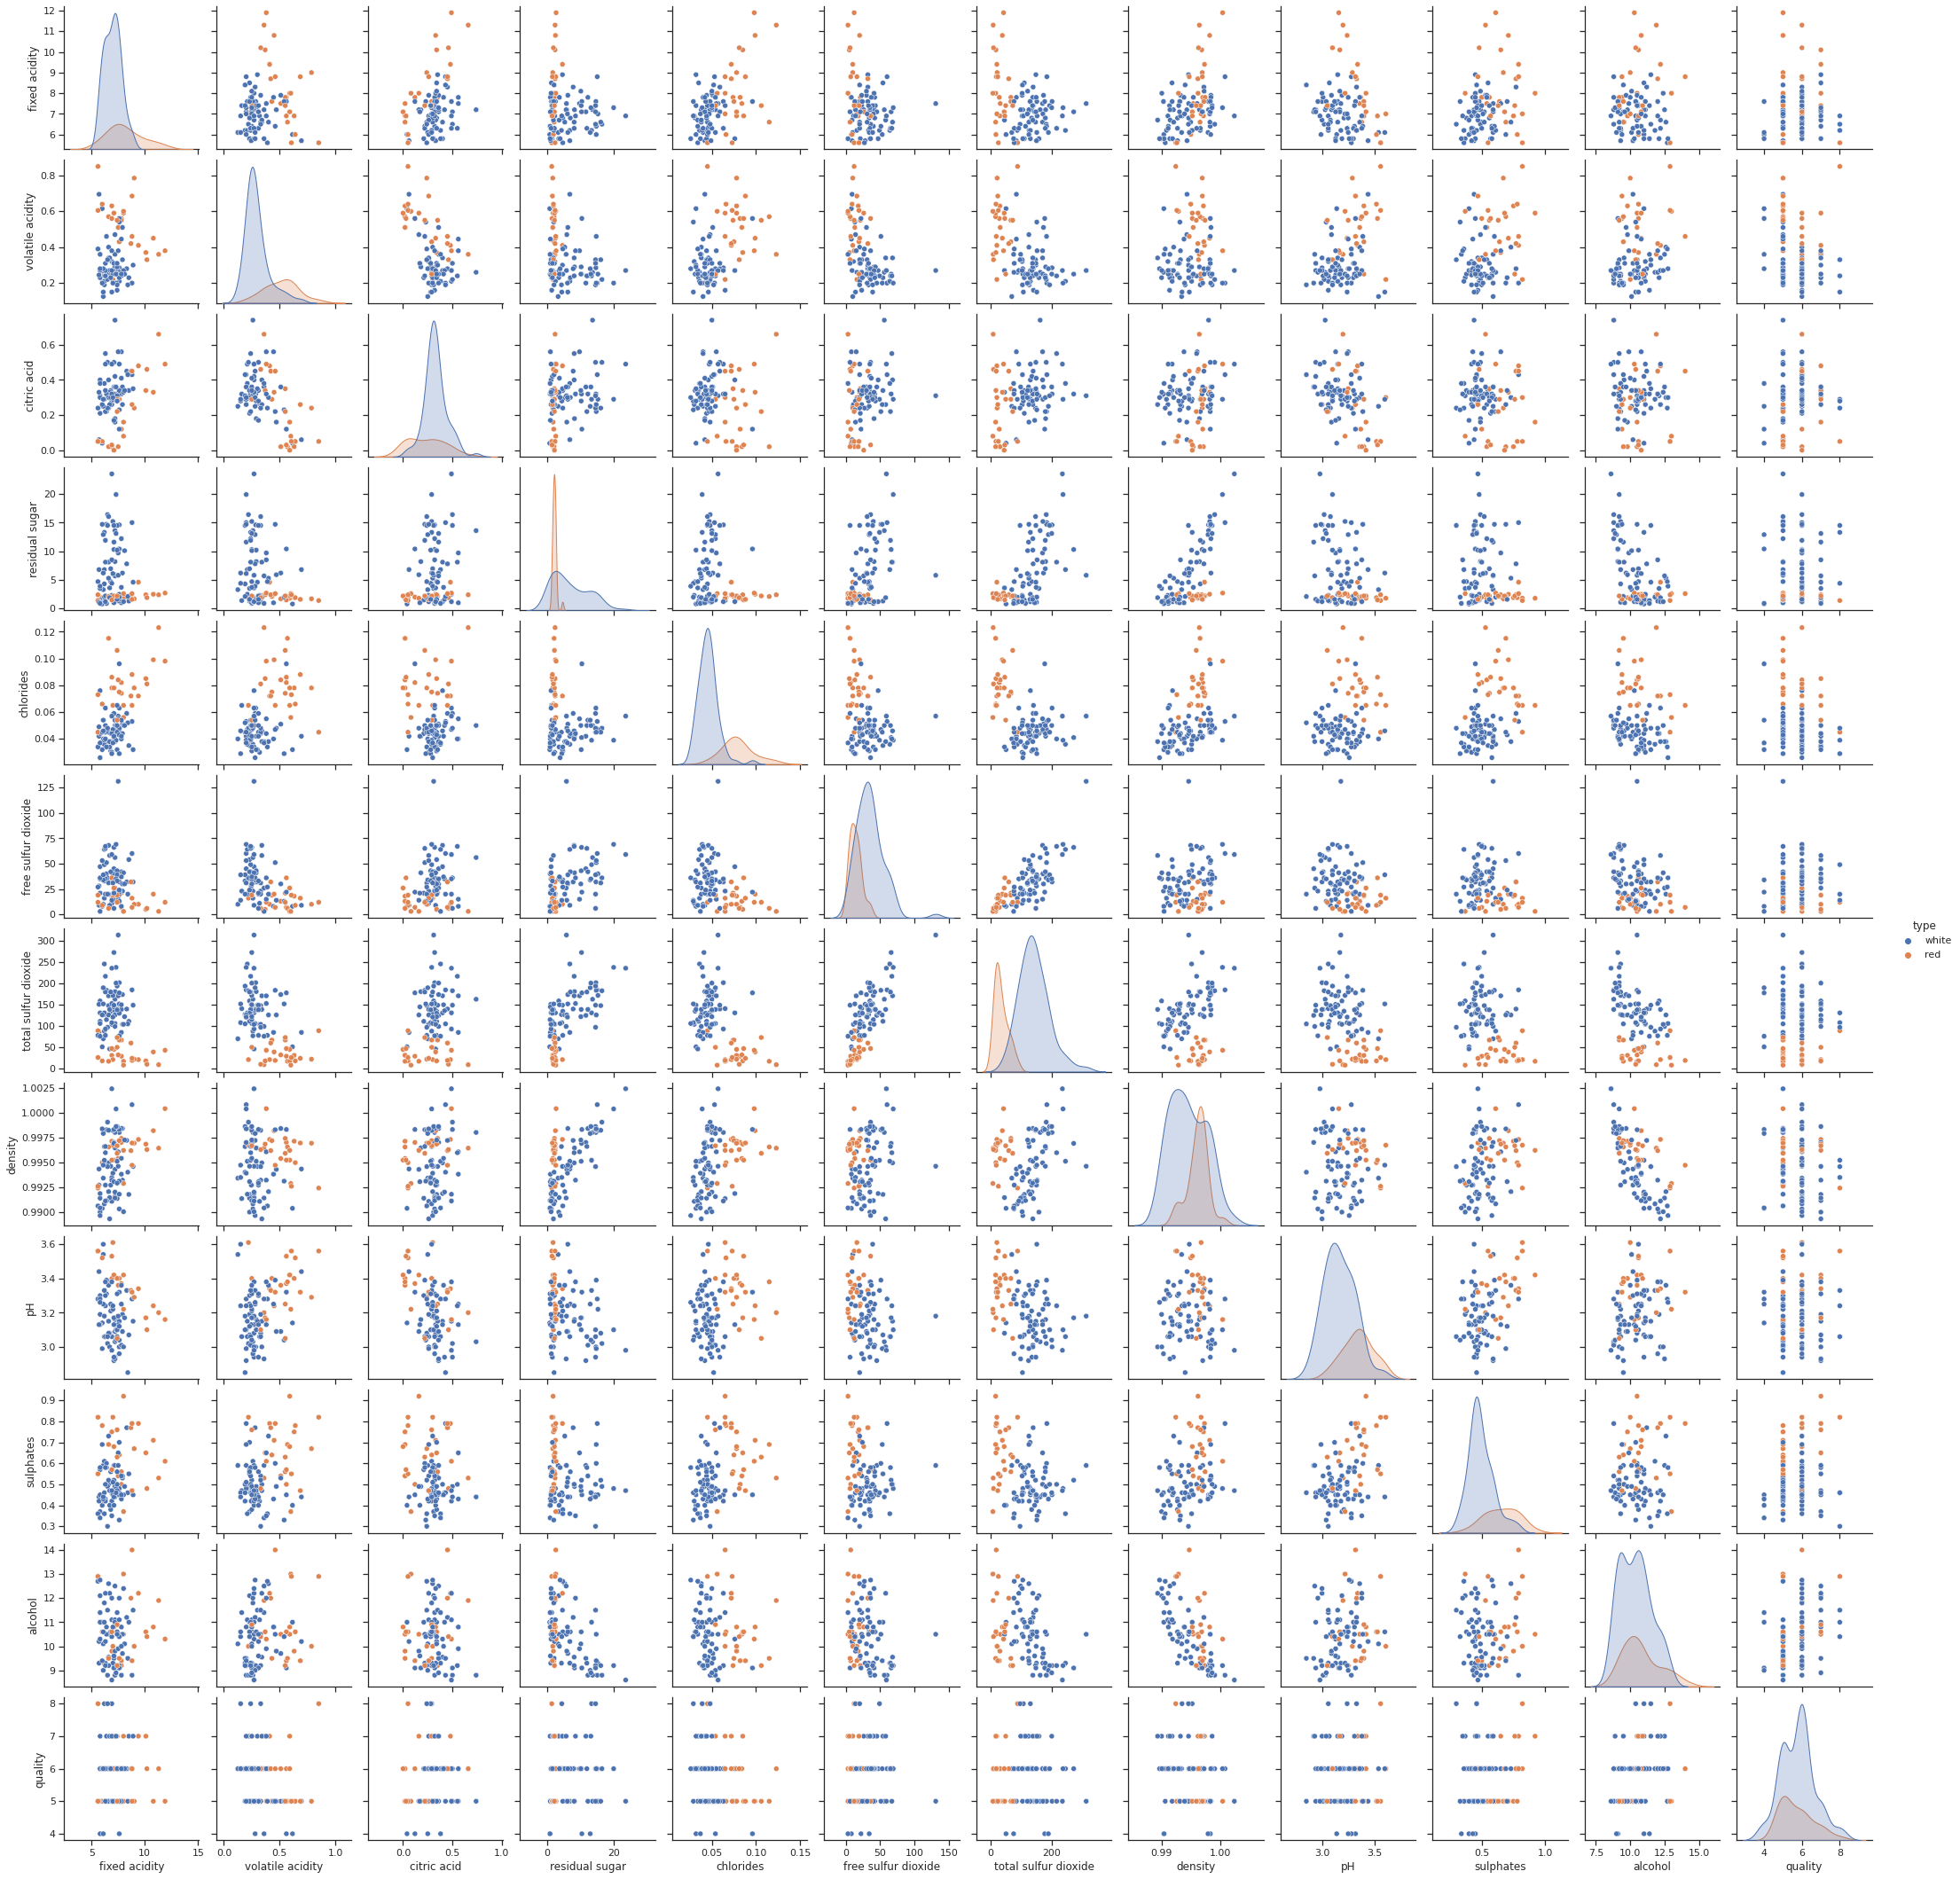

In [454]:
sns.pairplot(data=small_sample_df, hue=target)

#**Section 3: Feature selection**
-----
##Using domain knowledge for feature selection
One possible approach to feature selection involves making inferences from known data, either to highlight useful features or to remove useless features. To actually make this selection means relying on (in order): prior research on the topic, common knowledge, and personal experience.

Searching for research on the chemical composition of red vs. white wine was inconclusive, but a variety of lifestyle-oriented publications have written on the relative characteristics of red and white wine.

Summarizing these writings:
- White wines are commonly described as dry, crisp, and fruity, whereas red wines are described as rich and bitter.
- The process for fermenting each type of wine is different. White wines are produced from skinless grapes, whereas red wines are produced from the whole grape. This is why darker wines are more bitter: they contain tannin, a bitter-tasting chemical located in the skin of the grape.
- There are exceptions to the general flavor profile of a white vs. red wine, where a white might taste like a red and vice-versa.
- White wine's "crisp" profile is suggested to be the result of either residual sugar, acidity, or alcohol content.
- Alcohol content actually seems to be lower, on average, for white wines.

From my personal experience fermenting apple cider, dryness seems to be a byproduct of low residual sugar specifically. For example, a cider like Strongbow 'Original Dry' has just 2.6g sugar/100mL ([source](https://www.strongbow.com/ca/en/apple-ciders/original-dry)), and this is a cider I would compare to many of the "dry-er" ciders I have fermented myself.

###Reading tea leaves (selecting features from the scatterplot)
Combing the domain knowledge above with the scatterplot matrix, there are some useful insights:
- 'total sulfur dioxide' is an easy pick from the scattplot, since it is the most clearly differentiated features for the target.
  - 'free sulfur dioxide' is a clearly related feature to this one, but these probably should not be chosen together because they are not independent variables, and algorithms such as Naive Bayes work under the assumption that features are independent.
- 'residual sugar', a feature discussed above, is also interesting because almost 'red' samples are located in a small neighborhood on the range.
- 'chlorides' shows some clear differentiability, but was not a feature considered in domain knowledge because it did not come up in initial research. Chlorides and their impact on wine flavor seem to have been thoroughly studied, since high concentrations of chloride are considered to give an undesirable salty taste to wine. High concentrations of chloride are associated with red grape varietals,([source](https://www.scielo.br/j/cta/a/HQsrPrPMNZYgRzSKtrjHyHh/?format=pdf&lang=en)) particularly if the graps were grown near a coast ([source](https://mantech-inc.com/wp-content/uploads/2014/07/105-Chloride-in-Wine-by-Titration.pdf)); Portugal is coastal, so one explanation for the split in the data could be that white and red grape varietals are grown in separate vineyards, some near the coast and some further away.

Only one feature stands out as outright useless, and that is 'quality'. The distribution of the wines makes it look like either are around equally likely for any particular ranking.

Summarizing: the important features that seem evident from domain knowledge and graphical analysis are: {'total sulfur dioxide','residual sugar','chlorides'}, and 'quality' does not seem useful at all.

##Analytical approaches to feature selection
One drawback to using domain knowledge to choose important features is that it is a haphazard process prone to errors. An alternative is to use tangible metrics to score the importance of a variable, selecting the most important variables for model building.
###Mutual information scores
One of these approaches is by using MI (Mutual Information) scores. What these scores measure is the dependency between variables. The higher the score, the more closely dependent a feature is with the target variable.

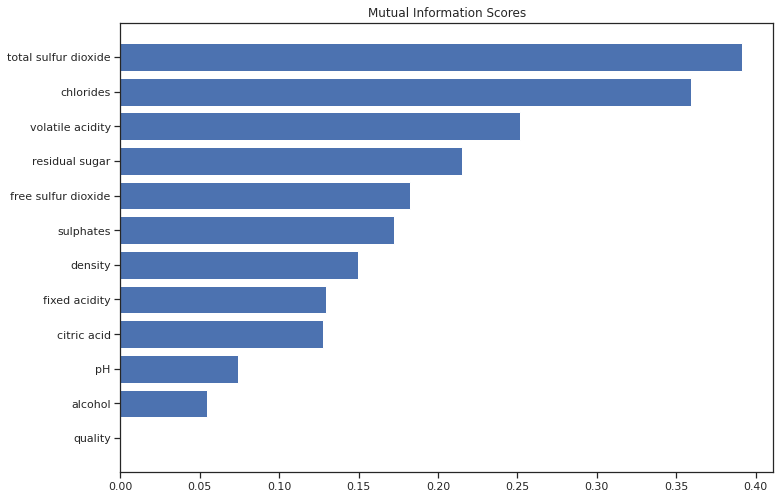

In [455]:
# Code from: https://www.kaggle.com/code/ryanholbrook/mutual-information
# reference on sklearn.feature_selection.mutual_info_classif: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif

# imports
from sklearn.feature_selection import mutual_info_classif

# prepare data ... here, we simply use 600 random samples to test the MI score
X = med_sample_df.copy()
y = X.pop(target)

# code for generating MI scores
def make_mi_scores(X, y):
    mi_scores = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y)
mi_scores[::3]  # show a few features with their MI scores

####Display
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

plot_mi_scores(mi_scores)

##Putting it all together

Three of four features identified above are in the top four MI scores. One feature which I did not identify was volatile acid. Since these findings agree with the previous domain analysis, the top two features are taken such as to avoid overfitting the data.

In [456]:
model_features = {'total sulfur dioxide', 'chlorides'}

#Section 4: Encoding features
-----
##What is encoding?
Encoding is a technique where data is transformed so that it can be fed into an algorithm. Since some algorithms take only specific types of data, encoding is a vital part of pre-processing.

##Encoding for Naive Bayes
There's a big, big problem with my features: they are all continous! Naive Bayes can only take discrete data, since continuous probabilities at a point X = x are equal to zero (this is a byproduct of having an infinite number of possible values in a continuous range of values). To tackle this problem, the following action will be taken:
1. Put the data into n equally distributed buckets corresponding to the % of samples in that range. For example, for n=3, values in the first 33% of samples are placed in bucket 1, the next 33% are placed in bucket 2, and the remaining samples are placed in bucket 3.
2. Using one-hot-encoding, transform the row into n mutually-exclusive rows with values of either 1 or 0.

I should note that point #1 has some hidden assumptions with potential consequences. By splitting the data evenly into n buckets, I am assuming that the target classes are distributed differently enough across those buckets for the condional probabilities to differentiate which target class is most likely within that range.

This is a bold assumption. What if, by chance, the data is distributed such that the most dominant target value (red) is most likely across all of the buckets for every feature? Then, the algorithm will be useless because it will always guess that the wine is red.

On the other hand: using too many buckets for the data is also a problem. Consider that keeping the data continuous is like having an infinite number of buckets, in which case the conditional probability of any particular point is equal.

In [457]:
 # qcut: https://stackoverflow.com/questions/53963183/how-to-use-kbinsdiscretizer-to-make-continuous-data-into-bins-in-sklearn
 # get_dummies: https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python

def one_hot_encode(raw, target, features, n_buckets):
  # get a dataframe with the features we care about
  df = raw[features].copy()

  # use Pandas to replace the values in each dataframe with the quantile they belong to
  for column in df:
    df[column] = pd.qcut(df[column], q=(n_buckets+1), labels=False)

  # expand each column out into mutually exclusive columns
  for column in df:
    onehot_columns = pd.get_dummies(df[column], prefix=column+' ',prefix_sep='', drop_first=True)
    df = pd.concat([df, onehot_columns],axis=1)
    df = df.drop(column, axis=1)

  # add the target back at the end of the dataframe ... everything have been done inplace, so this is okay
  df = pd.concat([raw_df[target],df],axis=1)
  #df[target] = raw[target].copy()

  return df

encoded_data = one_hot_encode(raw_df, target, model_features, 4)
display(encoded_data.head(2)) # sneak peak to see the data looks as expected

,type,chlorides 1,chlorides 2,chlorides 3,chlorides 4,total sulfur dioxide 1,total sulfur dioxide 2,total sulfur dioxide 3,total sulfur dioxide 4
3746,white,1,0,0,0,0,1,0,0
425,white,0,1,0,0,0,0,0,1


##Encoding for Logistic Regression and Multi-Layer Perceptron
Both algorithms, Logistic Regression and Multi-Layer perceptron, can take discrete or continuous variables. Given this, there are two options:
1. Pass the original data to either model as training data.
2. Encode the data the same way as with Naive Bayes.

Since this analysis hinges upon giving the same data to all three algorithms, the same encoding strategy will be used as with Naive Bayes shown above.

# Section 5: Making cuts for k-fold cross validation
-----
##Theory
K-fold cross validation is a method used to prevent overfitting. Overfitting occurs when a model performs well on training data, but fails to perform on real data. Through this process, data is split into k groups. Then, the model is trained k times (using a different data fold k for testing). By evaluating the performance of the model on all k runs, one obtains a better understanding on the general health of the model compared to if the model had been trained and tested only once.

##Considerations for the the wine dataset

"Randomness" is a subject worth exploring before I split the data using k-fold cross validation. For some datasets where samples are dependent, randomizing the data would be innapopriate (for example, some data sets where samples are dependent on time). However, the samples in my data are independent, so I want to reflect that in each of the folds I take.

This observation might initially seem to contradict the code immediately below, where the data does not appear to be shuffled. This is because when the data was initially read from CSV, it was shuffled using a pseudorandom seed. This approach was chosen so that the work in this notebook would be reproducible. Because the data was shuffled from a seed, that means anybody can shuffle the CSV the same way as was done in this report.

##Choice of k
For this report, 10-fold cross validation was selected since it is commonly used in data science literature. Examining the impact of taking different folds could be an interesting follow-up analysis, but is outside of the scope of this report.

In the following code, there is a function which takes a classifier and trains it using k-fold validation, then returns a dictionary with y_test, y_pred, x_train, and all 10 classifiers trained. This is done to avoid code duplication, as well as to provide a standard format to (1) evaluate each model and (2) retrieve true-positive, false-positive, true-negative, and false-negative predictions for each model in Section 10.

In [458]:
from sklearn.model_selection import KFold

# Performs K-Fold classification on a given classifier, returning a dictionary
# with y_test, y_pred, X_train for each run.
# AN IMPORTANT ASSUMPTION:
# The last iteration of K_fold is kept for analysis in Section 10. 
# This is done using pickle dump/load when K_fold is used.
def K_fold_classifier(data, clf, k=10):
  # Data to be returned to the caller
  prediction_data = {'y_pred' : [],
                     'y_test' : [],
                     'X_train': [],
                     'X_test' : [],
                     'clf' : []}

  # Intact feature and prediction sets: X, Y
  X = np.array(data.drop(columns=target, axis=1).values.tolist())
  y = np.array(data[target].values.tolist())

  # Specify the KFold split
  kfold_split = KFold(n_splits=10, random_state=None, shuffle=False)

  # Using the KFold split, fit the given classifier. Each time, we want to store
  # three things: X_test, y_test, y_pred. Why? All metrics about performance can
  # be derived from these values.
  for train_index, test_index in kfold_split.split(data):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # train model
    clf.fit(X_train, y_train)

    # get predictions
    y_pred = clf.predict(X_test)

    # store data on each run
    prediction_data['y_pred'].append(y_pred)
    prediction_data['y_test'].append(y_test)
    prediction_data['X_test'].append(X_test)
    prediction_data['X_train'].append(X_train)
    prediction_data['clf'].append(clf)
  
  return prediction_data

# Section 6,7: Training and testing (K-fold) the models
These sections have been combined, as separating them would mean repeating code unnecessarily between the sections. Instead, the function defined above will be used to simultaneously train *and* test three initial models for NB (Naive Bayes), LR (Logistic Regression), and MLP (Multi-Layer Perceptron) algorithms. 

As a starting point, all three models are defined using their default parameters. Then, they are trained and tested.

Finally, after models are trained the final model in the run is taken to compare to the others in Section 10. This is done under the assumption that all of the models used in k-fold analysis are relatively the same, so long as there is low variation between the models when they are evaluated using metrics like precision and recall later on.

In [459]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

NB_1_clf = MultinomialNB() # defining NB CLF
NB_1_data = K_fold_classifier(encoded_data, NB_1_clf) # training + collecting data from K-fold 
NB_1_clf = NB_1_data['clf'][9] # take the final model for Section 10

LR_1_clf = LogisticRegression()
LR_1_data = K_fold_classifier(encoded_data, LR_1_clf)
LR_1_clf = LR_1_data['clf'][9]

MLP_1_clf = MLPClassifier()
MLP_1_data = K_fold_classifier(encoded_data, MLP_1_clf)
MLP_1_clf = MLP_1_data['clf'][9]

#**Section 8: Evaluating the models**
##General form for evaluating model performance
The following code defines a common method for evaluating performance metrics. This code takes the dictionary returned by k_fold_classifier(...), parses the results, generated metrics of interest from the results, and finally prints the data.

In [460]:
from sklearn.metrics import classification_report
import seaborn as sns
def eval_performance_metrics(dictionary_of_predictions, title="Metrics for the model"):
  # pull data
  y_test = dictionary_of_predictions['y_test'].copy()
  y_pred  = dictionary_of_predictions['y_pred'].copy()

  # Prepare to calculate data
  performance = []
  averages = []
  variation = []

  # calculate metrics on each fold using classification_report
  for y_test, y_pred in zip(y_test, y_pred):
    performance.append(classification_report(y_test, y_pred, output_dict=True))


  # prepare to store metrics we care about
  metrics = {'Precision Red' : [],
             'Precision White' : [],
             'Macro Precision' : [],
             'Recall Red' : [],
             'Recall White' : [],
             'Macro Recall' : [],
             'Accuracy' : []} # micro average == accuracy for binary classification

  for evaluation in performance:
    metrics['Precision Red'].append(evaluation['red']['precision'])
    metrics['Recall Red'].append(evaluation['red']['recall']) # true sensitivity where red=(+)
    metrics['Precision White'].append(evaluation['white']['precision'])
    metrics['Recall White'].append(evaluation['white']['recall']) # true specificity where white=(-)
    metrics['Macro Precision'].append(evaluation['macro avg']['precision']) # average precision per class
    metrics['Macro Recall'].append(evaluation['macro avg']['recall']) # average recall per class
    metrics['Accuracy'].append(evaluation['accuracy']) # accuracy of all predictions

  # prepare to take average, variance
  metrics_avg = metrics.copy()
  metrics_var = {}

  # take average, variance
  for key in metrics:
    metrics_avg[key] = np.average(metrics[key])
    metrics_var['Average ' + key] = np.var(metrics[key])

  # plot the results
  keys = list(metrics_avg.keys())
  avg = list(metrics_avg.values())
  plt.title(title)
  sns.set(rc={'figure.figsize':(11.7,8.27)})
  sns.barplot(x=keys, y=avg)

  # display variance tabularly (it is often too small to show on the chart)
  var_data = pd.DataFrame([metrics_var])
  display(var_data)


##Naive Bayes, Run 1

,Average Precision Red,Average Precision White,Average Macro Precision,Average Recall Red,Average Recall White,Average Macro Recall,Average Accuracy
0,0.000608,0.000154,0.000202,0.001293,0.000053,0.000298,0.000128


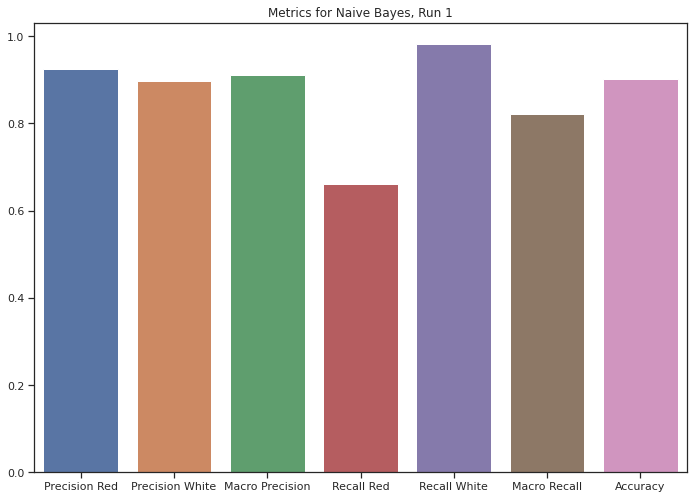

In [461]:
eval_performance_metrics(NB_1_data, title='Metrics for Naive Bayes, Run 1')

Recall that the distribution of the dataset is approximately 80% white wine samples and 20% red wine samples. Given that, these are remarkably good initial results from Naive Bayes; in particular, the precision that this model has for red samples is very good (~=0.93).

The model scores high (>=0.90) for most metrics, but there are two clear excpetions:
- Red recall ~=0.64, meaning that the model is less sensitive to red samples than white samples. This makes sense given the mechanisms behind NB, where the distribution of the samples (red:white) will affect the relative probabilities NB uses to make its predictions.
- Macro recall ~=0.81, which makes sense given the low recall on red samples.

One metric which teeters the 0.90 mark is accuracy, at 0.89. This is somewhat dissapointing since the lower-bound for accuracy should be 0.80 for the data (if one were to guess 'white' then their accuracy would be 0.80 on this dataset), but this still means that the model is wrong 50% less of the time compared to the baseline.

Regarding the trustworthiness of these findings, the data printed above the table demonstrates that variation is very low (max=0.000608) for each metric. These are calculated from the variation in each metric for all models built by k_fold_classifier(...). Because variation is low, that means that the model is not overly dependent on the training data; put another way, the model is not overfitted to the training data. 

Below, the statistics for the model trained on the last fold of data are printed out to examine exact values for each metric. This is not the exact data in the figure above, but it is roughly equivalent given the low varitation between runs.

In [462]:
print(classification_report(NB_1_data['y_test'][9],NB_1_data['y_pred'][9]))

              precision    recall  f1-score   support

         red       0.93      0.64      0.76       170
       white       0.88      0.98      0.93       476

    accuracy                           0.89       646
   macro avg       0.91      0.81      0.84       646
weighted avg       0.90      0.89      0.88       646



##Logistic Regression, Run 1

,Average Precision Red,Average Precision White,Average Macro Precision,Average Recall Red,Average Recall White,Average Macro Recall,Average Accuracy
0,0.000229,0.00002,0.000068,0.000231,0.00003,0.000065,0.000032


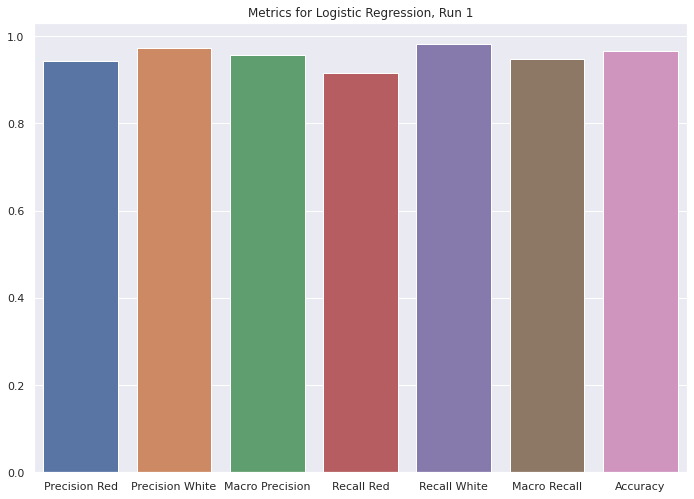

In [463]:
eval_performance_metrics(LR_1_data, title='Metrics for Logistic Regression, Run 1')

The first run with a logistic regression model shows promising improvement over the Naive Bayes model. Two scores in particular that stand out are 'Precision Red' and 'Accuracy', which are ~0.95 and ~0.96 respectively taken from the final k-fold model.

Likewise to the last model, variation between samples is very low, once again demonstrating that the model is not overfitted to the data. In fact: variation on 'Precision Red' and 'Accuracy' are each about half that of NB, meaning that for each fold there was less variation than with NB.

In [464]:
print(classification_report(LR_1_data['y_test'][9],LR_1_data['y_pred'][9]))

              precision    recall  f1-score   support

         red       0.95      0.91      0.93       170
       white       0.97      0.98      0.98       476

    accuracy                           0.96       646
   macro avg       0.96      0.95      0.95       646
weighted avg       0.96      0.96      0.96       646



##Multi-Layer Perceptron, Run 1

,Average Precision Red,Average Precision White,Average Macro Precision,Average Recall Red,Average Recall White,Average Macro Recall,Average Accuracy
0,0.000229,0.00002,0.000068,0.000231,0.00003,0.000065,0.000032


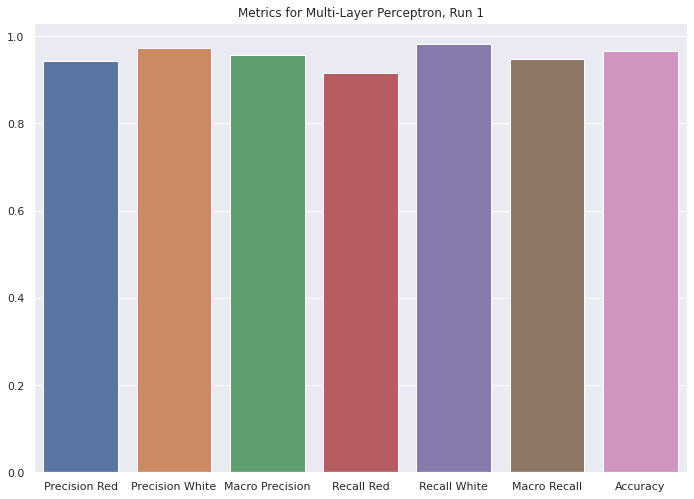

In [465]:
eval_performance_metrics(MLP_1_data, title='Metrics for Multi-Layer Perceptron, Run 1')

Finally, MLP had low variation between folds and showed moderately better results compared to LR. This model has an accuracy score of 0.96. The worst score for this model is on red recall, which may be an interesting metric to optimize for in future runs.

In [466]:
print(classification_report(MLP_1_data['y_test'][9],MLP_1_data['y_pred'][9]))

              precision    recall  f1-score   support

         red       0.95      0.91      0.93       170
       white       0.97      0.98      0.98       476

    accuracy                           0.96       646
   macro avg       0.96      0.95      0.95       646
weighted avg       0.96      0.96      0.96       646



###Closing remarks on run 1
One concern that existed during feature selection was that using mutual information (which are based on entropy scores) might overfit the data to Naive Bayes. However, given the results in this section it appears that these fears were misplaced. Naive Bayes performed the *worst* out of all the models, which reflects the fact that it often fails to pick up on subtle information which can be captured better with LR or (even better) by using MLP.

#**Section 9/10a: Modifying, training, and evaluating the models**
Section 9 and 10a were combined, since analysis of the models in this section depends on comparing them. Following this section will be 10b, where true-positives, false-positives, etc. are demonstrated.
##Naive Bayes, run 2
NB is the model which shows the most room for improvement from run 1. One way to improve the model would be to "cheat" and adjust the class_prior parameter, such that when the model is tested on the whole dataset variation might be lower. In a real-world scenario this probably would not be a sound strategy, but here it is done for exploration setting the class_prior to the known distribution of red to white samples.

,Average Precision Red,Average Precision White,Average Macro Precision,Average Recall Red,Average Recall White,Average Macro Recall,Average Accuracy
0,0.000341,0.000147,0.000156,0.001216,0.000029,0.000299,0.000127


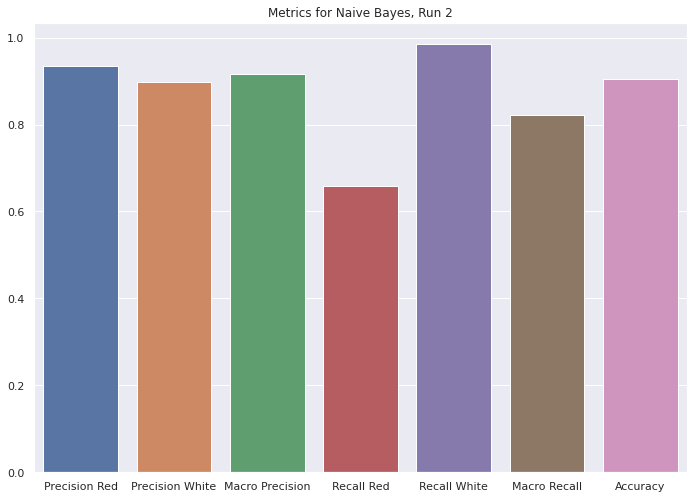

In [467]:
NB_2_clf = MultinomialNB(fit_prior=False,class_prior=[0.2,0.8])
NB_2_data = K_fold_classifier(encoded_data, NB_2_clf) 
NB_2_clf = NB_2_data['clf'][9]
eval_performance_metrics(NB_2_data, title='Metrics for Naive Bayes, Run 2')

This run is perfectly identical to the model in run 1. The reason for this is that in the previous run, MultinomialNB fit the class prior probabilities from the distribution of the data it was given as training data. Since the data was sorted, it already learned the class priors on its own.

From the low variance given above, it is clear that this model is also valid across different data folds just like in run 1.

In [468]:
print(classification_report(NB_2_data['y_test'][9],NB_2_data['y_pred'][9]))

              precision    recall  f1-score   support

         red       0.93      0.64      0.76       170
       white       0.88      0.98      0.93       476

    accuracy                           0.89       646
   macro avg       0.91      0.81      0.84       646
weighted avg       0.90      0.89      0.88       646



##Naive Bayes, run 3
In this final run, fit_prior is set to false such that the model assumes a uniform distribution of the classes. Undoubtedly, this will hurt the model given the uneven true distribution of red:white samples.

,Average Precision Red,Average Precision White,Average Macro Precision,Average Recall Red,Average Recall White,Average Macro Recall,Average Accuracy
0,0.000341,0.000147,0.000156,0.001216,0.000029,0.000299,0.000127


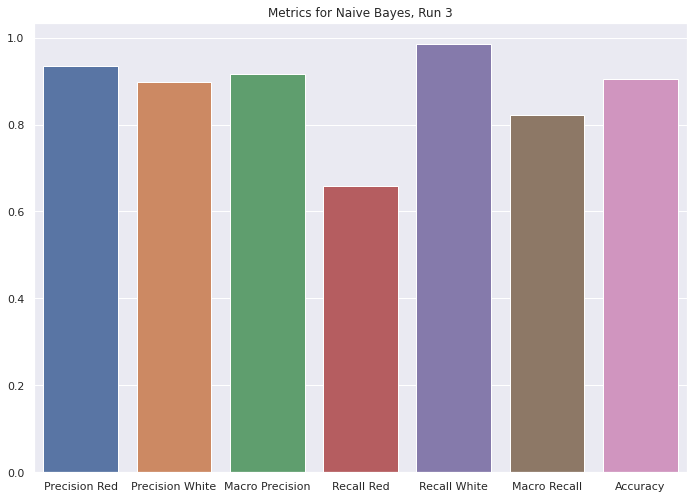

In [469]:
NB_3_clf = MultinomialNB(fit_prior=False,class_prior=[0.2,0.8])
NB_3_data = K_fold_classifier(encoded_data, NB_3_clf)
NB_3_clf = NB_3_data['clf'][9]
eval_performance_metrics(NB_3_data, title='Metrics for Naive Bayes, Run 3')

Interestingly, assuming

In [470]:
print(classification_report(NB_3_data['y_test'][9],NB_3_data['y_pred'][9]))

              precision    recall  f1-score   support

         red       0.93      0.64      0.76       170
       white       0.88      0.98      0.93       476

    accuracy                           0.89       646
   macro avg       0.91      0.81      0.84       646
weighted avg       0.90      0.89      0.88       646



##Logistic Regression, run 2
'C' is a LR parameter specifying regularization strength, where smaller values increase regularization. However, by experimentation it seems that C has to be modifier significantly for changes to occur on the model metrics. Even at C=0.1, a reduction by a tenth, no metrics change in the model.

,Average Precision Red,Average Precision White,Average Macro Precision,Average Recall Red,Average Recall White,Average Macro Recall,Average Accuracy
0,0.00025,0.000027,0.000084,0.000226,0.000034,0.00007,0.000043


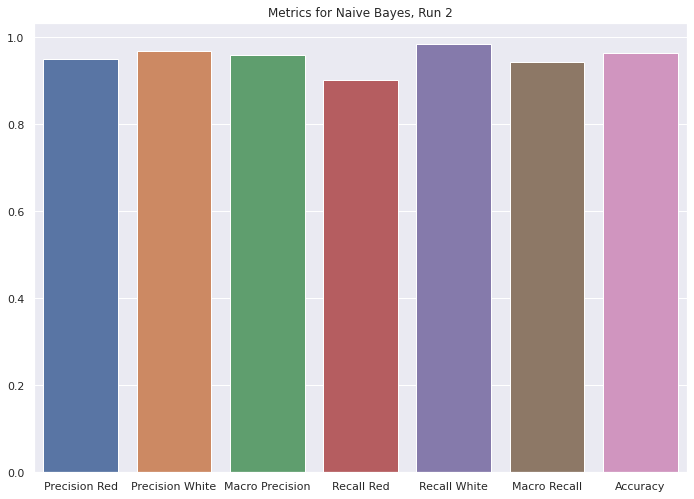

In [471]:
LR_2_clf = LogisticRegression(C=0.1)
LR_2_data = K_fold_classifier(encoded_data, LR_2_clf)
LR_2_clf = LR_2_data['clf'][9]
eval_performance_metrics(LR_2_data, title='Metrics for Naive Bayes, Run 2')

(These metrics are *exactly identical* to the metrics found in LR, run 1.)

In [472]:
print(classification_report(LR_2_data['y_test'][9],LR_2_data['y_pred'][9]))

              precision    recall  f1-score   support

         red       0.95      0.89      0.92       170
       white       0.96      0.98      0.97       476

    accuracy                           0.96       646
   macro avg       0.96      0.94      0.95       646
weighted avg       0.96      0.96      0.96       646



Decreasing C even further, finally there is some change in the model.

,Average Precision Red,Average Precision White,Average Macro Precision,Average Recall Red,Average Recall White,Average Macro Recall,Average Accuracy
0,0.000341,0.000147,0.000156,0.001216,0.000029,0.000299,0.000127


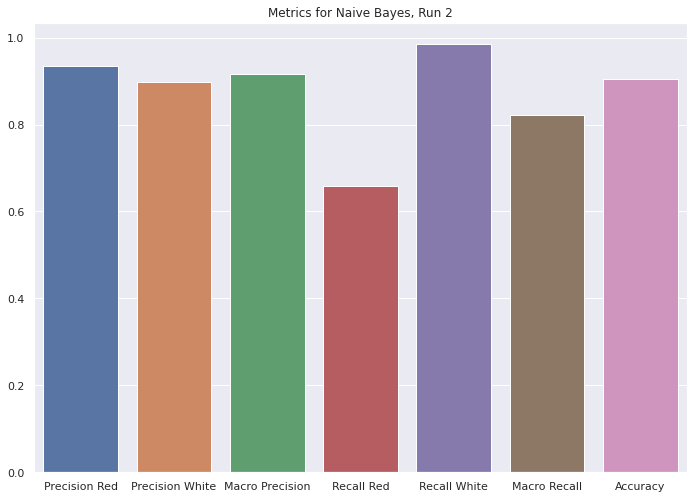

In [473]:
LR_2_clf = LogisticRegression(C=0.01)
LR_2_data = K_fold_classifier(encoded_data, LR_2_clf)
LR_2_clf = LR_2_data['clf'][9]
eval_performance_metrics(LR_2_data, title='Metrics for Naive Bayes, Run 2')

In [474]:
print(classification_report(LR_2_data['y_test'][9],LR_2_data['y_pred'][9]))

              precision    recall  f1-score   support

         red       0.93      0.64      0.76       170
       white       0.88      0.98      0.93       476

    accuracy                           0.89       646
   macro avg       0.91      0.81      0.84       646
weighted avg       0.90      0.89      0.88       646



But -- this does not make the model any better than before. In fact, multiple measures decrease:
- red precision decreases from 0.95 to 0.93
- white precision 0.97 -> 0.88
- macro recall 0.95 -> 0.81
- accuracy 0.96 -> 0.89
- etc...

It seems that by increasing regularization, the model becomes overfitted to predict a small number of exceptional samples, and in doing so the model fails to recognize a greater number of samples that follow a normal pattern in the data. Does this model indicate a strongly overfitted one? Variation is low and model accuracy is still better than the baseline overall, but compared to the last LR run this is not as optimized to the problem.

##Logistic Regression, run 3
In this final example, the class_weight parameter is set to class_weight='balanced'. By default all classes are given an equal weight, but with this new setting the algorithm will adjust itself to

,Average Precision Red,Average Precision White,Average Macro Precision,Average Recall Red,Average Recall White,Average Macro Recall,Average Accuracy
0,0.000341,0.000147,0.000156,0.001216,0.000029,0.000299,0.000127


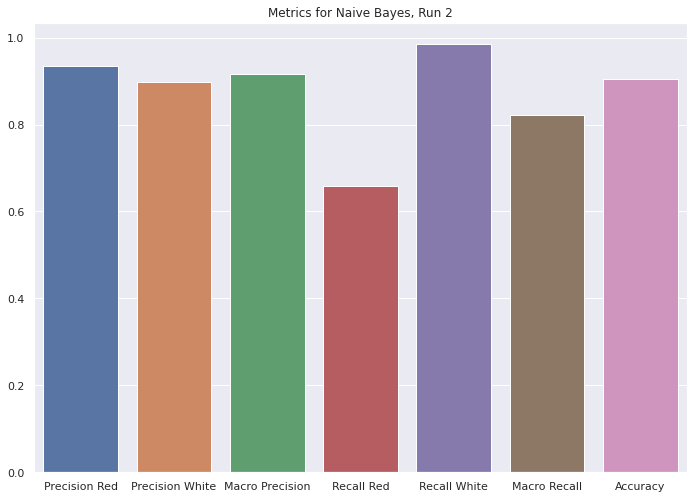

In [475]:
LR_3_clf = LogisticRegression(class_weight='balanced')
LR_3_data = K_fold_classifier(encoded_data, LR_2_clf)
LR_3_clf = LR_3_data['clf'][9]
eval_performance_metrics(LR_3_data, title='Metrics for Naive Bayes, Run 2')

As expected, the model degrades considerably when class_weight is disabled. Some substantial changes, comparing the model to run 1, are listed here:
- red recall 0.91 -> 0.64 (-0.07)
- accuracy 0.96 -> 0.89 (-0.07)
- white accuracy 0.97 -> 0.88 (-0.09)

In [476]:
print(classification_report(LR_3_data['y_test'][9],LR_2_data['y_pred'][9]))

              precision    recall  f1-score   support

         red       0.93      0.64      0.76       170
       white       0.88      0.98      0.93       476

    accuracy                           0.89       646
   macro avg       0.91      0.81      0.84       646
weighted avg       0.90      0.89      0.88       646



##Multi-Layer Perceptron, run 2
MLP is significantly more complicated than the other two models, making it much harder to choose a setting to modify. Therefore, we adopt an analytical approach. Using GridSearchCV, the model is tested and built using different settings for the activation function (the function used at each node to choose whether or not to turn on or off.) Then, the results are graphed and compared.

max_iter is set to a high value, such that the model has time to properly optimize itself during each run. The metric optimized by GridSearchCV is set to macro F1, since this is a good combined metric of precision and accuracy used on imbalanced data sets.

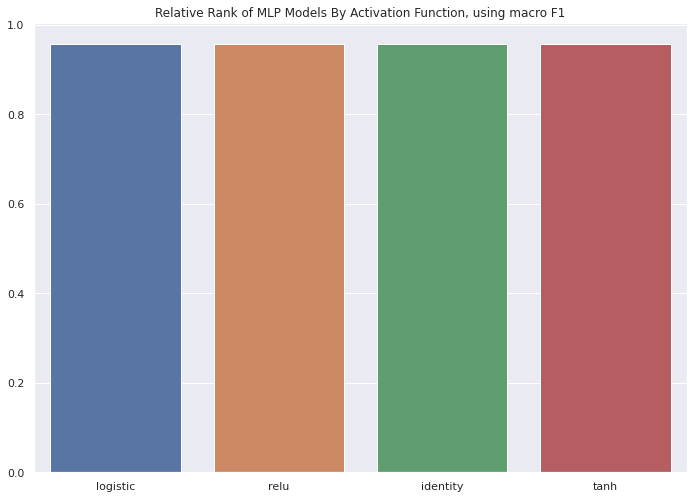

In [477]:
# imports
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score


def display_rank(title, data_source):
  # convert dictionary to a useable format for Seaborn
  stats_df = pd.DataFrame.from_records([data_source])

  sns.set(rc={'figure.figsize':(11.7,8.27)})
  plt.title(title)
  sns.barplot(data=stats_df)
  plt.show()

# Optimizes MLPClassifier based on parameters passed in param_grid. cv=10 indicates that the function will use 10-fold cross validation.
# GridSearchCV implements K-Fold using StratifiedKFold since the features given to it are binary. I use KFold for my runs, but the end result is the same.
# Ranks the activation selection according to the specified
def optimize_MLP(df, param_grid, scoring, optimization_value, save_loc, k=10):
  i = 0
  X = np.array(df.drop(columns=target, axis=1).values.tolist()) # features
  y = np.array(df[target].values.tolist()) # target values

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33) # take a test, holdout set

  # Sequentially test for the best scoring parameter. Score it, save the score; repeat until all are scored.
  while (len(param_grid[optimization_value]) > 0):
    i += 1
    clf = GridSearchCV(estimator=MLPClassifier(), param_grid=param_grid, cv=k, scoring=scoring)
    clf.fit(X_train, y_train)
    param_score = clf.score(X_test, y_test)

    # select, print, and remove the best parameter from consideration before repeating
    top_ranked = clf.best_params_[optimization_value]
    param_grid[optimization_value] = tuple(x for x in param_grid[optimization_value] if x != top_ranked)
    
    save_loc[top_ranked] = param_score # save the score of each value

## Test for macro F1, varying activation function
activation_f1_macro_score = {}
optimize_MLP(encoded_data, param_grid={'max_iter' : [1200],'activation' : ('relu','identity','logistic','tanh')}, 
                   scoring='f1_macro', optimization_value='activation', save_loc=activation_f1_macro_score)
display_rank(title="Relative Rank of MLP Models By Activation Function, using macro F1", data_source=activation_f1_macro_score)

Unfortunately, this is a dead end for further optimizing the model since all of the activation functions work equally well for this application. Still, this demonstrates the versatility of MLP. Given a sufficient number of iterations, no single parameter has an effect on the model since it is already highly performant on the dataset.

Since no better performing model can be attained, no other MLP models are trained.

#**Section 10b: examining good and bad predictions for each model**
The final challenge of this report is to examine some tangible examples of good predictions (true positives, true negatives) and bad predictions (false positives, false negatives) made by each model.

Below, there is code which sorts the predictions a given model made on a test set into lists corresponding to the type of prediction listed above.

In [478]:
# Given a dictionary of predictions with y_test, y_pred, X_test, sorts
# X_test into categories for true-positive, false-positive,
# true-negative, and false-negative. The classes and positive class reflect
# the conventions in this report. Since the final clf is used for each model,
# only the last set of predictions is parsed for this purpose.
# Returns a dictionary of prediction types.
def split_posneg(dictionary_of_predictions, classes={'red','white'}, pos_class='red'):
  # pull data
  y_test = dictionary_of_predictions['y_test'][9].copy()
  y_pred  = dictionary_of_predictions['y_pred'][9].copy()
  X_test  = dictionary_of_predictions['X_test'][9].copy()
  # Prepare for data collection
  posneg = {
      'TP' : [],
      'FP' : [],
      'TN' : [],
      'FN' : []
  }

  for y_test, y_pred, X_test in zip(y_test, y_pred, X_test):
    if ((y_pred == y_test) and y_test==pos_class): # TP
      posneg['TP'].append(X_test)
    elif ((y_pred == y_test) and y_test!=pos_class): # TN
      posneg['TN'].append(X_test)
    elif ((y_pred != y_test) and y_test==pos_class): #FN
      posneg['FN'].append(X_test)
    else: #FP
      posneg['FP'].append(X_test)

  return posneg

def display_posneg(dictionary_of_predictions, title):
  posneg = split_posneg(dictionary_of_predictions)
  dataframe = pd.DataFrame()

  for pred_type in posneg:
    print('The following table displays 5 predictions of',pred_type, ' made by ', title)
    display(posneg[pred_type][0:6])
    print('\n')


###Peaking back at the data
Since much of the data herein is stored as binary fields, the data is printed here again to show the layout of the data used to make predictions.

In [479]:
display(encoded_data.head(2))

,type,chlorides 1,chlorides 2,chlorides 3,chlorides 4,total sulfur dioxide 1,total sulfur dioxide 2,total sulfur dioxide 3,total sulfur dioxide 4
3746,white,1,0,0,0,0,1,0,0
425,white,0,1,0,0,0,0,0,1


##Naive Bayes
###Discussion
In the following data, it seems that Naive Bayes strongly associated a high level of Chlorides with a red prediction. This reflects the domain knowledge introduced during feature selection, where it was noted that some research concluded red wine were higher in chlorides compared to other wines. This would particularly be the case in portugal, where many vinyards are located by the coast (i.e. where salt, sodium chloride, would be taken up by the grapes used to produce the wine).

It seems that for "negative" predictions, the model learned to strongly associate white wines with samples that had low chlorides, and a higher quantity of sulfur dioxide.
### Run 1

In [480]:
display_posneg(NB_1_data, 'Naive Bayes, run 1')

The following table displays 5 predictions of TP  made by  Naive Bayes, run 1


[array([0, 0, 0, 1, 0, 0, 0, 0]),
 array([0, 0, 0, 1, 1, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 0, 0, 0])]



The following table displays 5 predictions of FP  made by  Naive Bayes, run 1


[array([0, 0, 0, 1, 0, 1, 0, 0]),
 array([0, 0, 0, 1, 0, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 1, 0, 0]),
 array([0, 0, 0, 1, 0, 1, 0, 0]),
 array([0, 0, 0, 1, 1, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 1, 0, 0])]



The following table displays 5 predictions of TN  made by  Naive Bayes, run 1


[array([0, 0, 0, 0, 1, 0, 0, 0]),
 array([1, 0, 0, 0, 0, 1, 0, 0]),
 array([1, 0, 0, 0, 0, 0, 1, 0]),
 array([1, 0, 0, 0, 0, 1, 0, 0]),
 array([1, 0, 0, 0, 0, 0, 0, 1]),
 array([0, 0, 0, 0, 0, 0, 0, 0])]



The following table displays 5 predictions of FN  made by  Naive Bayes, run 1


[array([0, 0, 1, 0, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 0, 0, 0])]

###Run 2

In [481]:
display_posneg(NB_2_data, 'Naive Bayes, run 2')

The following table displays 5 predictions of TP  made by  Naive Bayes, run 2


[array([0, 0, 0, 1, 0, 0, 0, 0]),
 array([0, 0, 0, 1, 1, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 0, 0, 0])]



The following table displays 5 predictions of FP  made by  Naive Bayes, run 2


[array([0, 0, 0, 1, 0, 1, 0, 0]),
 array([0, 0, 0, 1, 0, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 1, 0, 0]),
 array([0, 0, 0, 1, 0, 1, 0, 0]),
 array([0, 0, 0, 1, 1, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 1, 0, 0])]



The following table displays 5 predictions of TN  made by  Naive Bayes, run 2


[array([0, 0, 0, 0, 1, 0, 0, 0]),
 array([1, 0, 0, 0, 0, 1, 0, 0]),
 array([1, 0, 0, 0, 0, 0, 1, 0]),
 array([1, 0, 0, 0, 0, 1, 0, 0]),
 array([1, 0, 0, 0, 0, 0, 0, 1]),
 array([0, 0, 0, 0, 0, 0, 0, 0])]



The following table displays 5 predictions of FN  made by  Naive Bayes, run 2


[array([0, 0, 1, 0, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 0, 0, 0])]

###Run 3

In [482]:
display_posneg(NB_3_data, 'Naive Bayes, run 3')

The following table displays 5 predictions of TP  made by  Naive Bayes, run 3


[array([0, 0, 0, 1, 0, 0, 0, 0]),
 array([0, 0, 0, 1, 1, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 0, 0, 0])]



The following table displays 5 predictions of FP  made by  Naive Bayes, run 3


[array([0, 0, 0, 1, 0, 1, 0, 0]),
 array([0, 0, 0, 1, 0, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 1, 0, 0]),
 array([0, 0, 0, 1, 0, 1, 0, 0]),
 array([0, 0, 0, 1, 1, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 1, 0, 0])]



The following table displays 5 predictions of TN  made by  Naive Bayes, run 3


[array([0, 0, 0, 0, 1, 0, 0, 0]),
 array([1, 0, 0, 0, 0, 1, 0, 0]),
 array([1, 0, 0, 0, 0, 0, 1, 0]),
 array([1, 0, 0, 0, 0, 1, 0, 0]),
 array([1, 0, 0, 0, 0, 0, 0, 1]),
 array([0, 0, 0, 0, 0, 0, 0, 0])]



The following table displays 5 predictions of FN  made by  Naive Bayes, run 3


[array([0, 0, 1, 0, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 0, 0, 0])]

##Logistic Regression
###Discussion
The discussion under "Naive Bayes" remains true given the data; red wines are associated with high chlorides and low total sulfur dioxide. By contrast, white wines are associated with low chlorides and high total sulfur dioxide.

Both models have issues differentiating samples with moderate levels of chloride *and* moderate levels of sulfur dioxide. Both also seem predisposed to classifying any sample with high chlorides with a positive 'red' prediction.
###Run 1

In [483]:
display_posneg(LR_1_data, 'Logistic Regression, run 1')

The following table displays 5 predictions of TP  made by  Logistic Regression, run 1


[array([0, 0, 0, 1, 0, 0, 0, 0]),
 array([0, 0, 0, 1, 1, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 0, 0, 0])]



The following table displays 5 predictions of FP  made by  Logistic Regression, run 1


[array([0, 0, 0, 1, 0, 1, 0, 0]),
 array([0, 0, 0, 1, 0, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 1, 0, 0]),
 array([0, 0, 0, 1, 0, 1, 0, 0]),
 array([0, 0, 0, 1, 1, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 1, 0, 0])]



The following table displays 5 predictions of TN  made by  Logistic Regression, run 1


[array([0, 0, 0, 0, 1, 0, 0, 0]),
 array([1, 0, 0, 0, 0, 1, 0, 0]),
 array([1, 0, 0, 0, 0, 0, 1, 0]),
 array([1, 0, 0, 0, 0, 1, 0, 0]),
 array([1, 0, 0, 0, 0, 0, 0, 1]),
 array([0, 0, 0, 0, 0, 0, 0, 0])]



The following table displays 5 predictions of FN  made by  Logistic Regression, run 1


[array([0, 0, 1, 0, 0, 1, 0, 0]),
 array([0, 0, 0, 1, 0, 0, 1, 0]),
 array([0, 0, 1, 0, 1, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 1, 0, 0, 0]),
 array([1, 0, 0, 0, 0, 0, 0, 0])]

In [484]:
display_posneg(LR_2_data, 'Logistic Regression, run 2')

The following table displays 5 predictions of TP  made by  Logistic Regression, run 2


[array([0, 0, 0, 1, 0, 0, 0, 0]),
 array([0, 0, 0, 1, 1, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 0, 0, 0])]



The following table displays 5 predictions of FP  made by  Logistic Regression, run 2


[array([0, 0, 0, 1, 0, 1, 0, 0]),
 array([0, 0, 0, 1, 0, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 1, 0, 0]),
 array([0, 0, 0, 1, 0, 1, 0, 0]),
 array([0, 0, 0, 1, 1, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 1, 0, 0])]



The following table displays 5 predictions of TN  made by  Logistic Regression, run 2


[array([0, 0, 0, 0, 1, 0, 0, 0]),
 array([1, 0, 0, 0, 0, 1, 0, 0]),
 array([1, 0, 0, 0, 0, 0, 1, 0]),
 array([1, 0, 0, 0, 0, 1, 0, 0]),
 array([1, 0, 0, 0, 0, 0, 0, 1]),
 array([0, 0, 0, 0, 0, 0, 0, 0])]



The following table displays 5 predictions of FN  made by  Logistic Regression, run 2


[array([0, 0, 1, 0, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 0, 0, 0])]

In [485]:
display_posneg(LR_3_data, 'Logistic Regression, run 3')

The following table displays 5 predictions of TP  made by  Logistic Regression, run 3


[array([0, 0, 0, 1, 0, 0, 0, 0]),
 array([0, 0, 0, 1, 1, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 0, 0, 0])]



The following table displays 5 predictions of FP  made by  Logistic Regression, run 3


[array([0, 0, 0, 1, 0, 1, 0, 0]),
 array([0, 0, 0, 1, 0, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 1, 0, 0]),
 array([0, 0, 0, 1, 0, 1, 0, 0]),
 array([0, 0, 0, 1, 1, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 1, 0, 0])]



The following table displays 5 predictions of TN  made by  Logistic Regression, run 3


[array([0, 0, 0, 0, 1, 0, 0, 0]),
 array([1, 0, 0, 0, 0, 1, 0, 0]),
 array([1, 0, 0, 0, 0, 0, 1, 0]),
 array([1, 0, 0, 0, 0, 1, 0, 0]),
 array([1, 0, 0, 0, 0, 0, 0, 1]),
 array([0, 0, 0, 0, 0, 0, 0, 0])]



The following table displays 5 predictions of FN  made by  Logistic Regression, run 3


[array([0, 0, 1, 0, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 0, 0, 0])]

##Multi-Layer Perceptron

MLP performs better than the other models, but it appears to use the same general scheme for each type of prediction as the others.

In [486]:
display_posneg(MLP_1_data, 'Multi-Layer Perceptron, run 1')

The following table displays 5 predictions of TP  made by  Multi-Layer Perceptron, run 1


[array([0, 0, 0, 1, 0, 0, 0, 0]),
 array([0, 0, 0, 1, 1, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 0, 0, 0])]



The following table displays 5 predictions of FP  made by  Multi-Layer Perceptron, run 1


[array([0, 0, 0, 1, 0, 1, 0, 0]),
 array([0, 0, 0, 1, 0, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 1, 0, 0]),
 array([0, 0, 0, 1, 0, 1, 0, 0]),
 array([0, 0, 0, 1, 1, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 1, 0, 0])]



The following table displays 5 predictions of TN  made by  Multi-Layer Perceptron, run 1


[array([0, 0, 0, 0, 1, 0, 0, 0]),
 array([1, 0, 0, 0, 0, 1, 0, 0]),
 array([1, 0, 0, 0, 0, 0, 1, 0]),
 array([1, 0, 0, 0, 0, 1, 0, 0]),
 array([1, 0, 0, 0, 0, 0, 0, 1]),
 array([0, 0, 0, 0, 0, 0, 0, 0])]



The following table displays 5 predictions of FN  made by  Multi-Layer Perceptron, run 1


[array([0, 0, 1, 0, 0, 1, 0, 0]),
 array([0, 0, 0, 1, 0, 0, 1, 0]),
 array([0, 0, 1, 0, 1, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 1, 0, 0, 0]),
 array([1, 0, 0, 0, 0, 0, 0, 0])]

#**FINAL: REFERENCES**
#References
-----
##Section 1
Poem: http://poemsintranslation.blogspot.com/2015/07/hafiz-ghazal-367-human-wine-and-song.html?m=1

Background information on first historical evidence of wine production:
1: https://www.decanter.com/wine-news/armenian-find-is-world-s-oldest-winery-42433/
2:https://www.sciencedirect.com/science/article/pii/S2212977418300619?via%3Dihub

Article on the "drunk elephants" viral story: https://www.wusa9.com/article/news/verify/verify-did-elephants-get-drunk-on-corn-wine-while-humans-were-social-distancing/507-0c48ef63-33ec-478f-be6a-4ebdeb4b0299

Consulted for information on the size of the Canadian wine industry: https://www.winegrowerscanada.ca/our-industry/economic-impact/

Study about student sommeliers: http://www.daysyn.com/Morrot.pdf

Article written on wine tasting: https://gizmodo.com/wine-tasting-is-bullshit-heres-why-496098276
##Section 3
Sources in this section were consulted on for domain knowledge comparing red and white wines:

https://www.scielo.br/j/cta/a/HQsrPrPMNZYgRzSKtrjHyHh/?format=pdf&lang=en

https://mantech-inc.com/wp-content/uploads/2014/07/105-Chloride-in-Wine-by-Titration.pdf

#####MI scores
Code taken from: https://www.kaggle.com/code/ryanholbrook/mutual-information

Reference on analytical feature selection: https://scikit-learn.org/stable/modules/feature_selection.html

Reference on MI score: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif

Discussion on parameters for MLP: https://stackoverflow.com/questions/46028914/multilayer-perceptron-convergencewarning-stochastic-optimizer-maximum-iterat

##Section 5
Theory on K-fold cross validation taken from:
https://machinelearningmastery.com/k-fold-cross-validation/#:~:text=Cross%2Dvalidation%20is%20a%20resampling,is%20to%20be%20split%20into.

https://scikit-learn.org/stable/modules/cross_validation.html

https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-and-model-selection
##Section 6, 7, 8
Initial idea to use GridSearchCV was taken from: https://stackoverflow.com/questions/46028914/multilayer-perceptron-convergencewarning-stochastic-optimizer-maximum-iterat

GridSearchCV documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Consulted on performance measures (precision, recall, F-measure): https://machinelearningmastery.com/precision-recall-and-f-measure-for-imbalanced-classification/

Consulted on performance measures (macro-avg, micro-avg): https://www.kaggle.com/general/185896

##Section 10
For confusion matrix calculations: https://stackoverflow.com/questions/31324218/scikit-learn-how-to-obtain-true-positive-true-negative-false-positive-and-fal

Precision: https://c3.ai/glossary/machine-learning/precision/

Recall: https://c3.ai/glossary/data-science/recall/

Balanced accuracy: https://statisticaloddsandends.wordpress.com/2020/01/23/what-is-balanced-accuracy/

# OTHER SOURCES
Some sources were used on prior iterations, but I am not sure now which sections they correspond to. They are listed in this section, such that no sources are missing.

Data source: https://www.kaggle.com/datasets/rajyellow46/wine-quality

Feature utility metric reference: https://www.kaggle.com/code/ryanholbrook/mutual-information

Categorical variables: https://www.kaggle.com/code/alexisbcook/categorical-variables/tutorial

https://www.kaggle.com/code/ryanholbrook/mutual-information

(Reference on feature selection: https://scikit-learn.org/stable/modules/feature_selection.html)

https://guhanesvar.medium.com/feature-selection-based-on-mutual-information-gain-for-classification-and-regression-d0f86ea5262a

Kaggle feature engineering tutorials: https://www.kaggle.com/learn/feature-engineering

# DISCLOSURE

This is the third dataset I selected for this project. Since there may have been influence on this iteration by the work I did on my last two datasets, I have included references to the resources I used in the first iteration of this project under "Works Cited."

Iteration 1 is also available on Github: https://github.com/journalWheat/CSI4106Project1-JaredWagner

As well as iteration 2: 
https://github.com/journalWheat/CSI4106-Project1-JaredWagner-WaterPotability